<a href="https://colab.research.google.com/github/nrenzan/AbstractiveTextSummarization/blob/main/Handwritten_text_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
!unzip /content/drive/MyDrive/DL/images-final.zip


Archive:  /content/drive/MyDrive/DL/images-final.zip
   creating: images/
  inflating: images/split.sh         
  inflating: images/generate_csv.sh  
   creating: images/train/
  inflating: images/train/Codeine-2.png  
  inflating: images/train/Codeine-4.png  
  inflating: images/train/Dextropropoxyphene-1.png  
  inflating: images/train/Dextropropoxyphene-5.png  
  inflating: images/train/Ethylmorphine-5.png  
  inflating: images/train/Ethylmorphine-2.png  
  inflating: images/train/Ethylmorphine-1.png  
  inflating: images/train/Etorphine-4.png  
  inflating: images/train/Etorphine-3.png  
  inflating: images/train/Fentanyl-4.png  
  inflating: images/train/Fentanyl-5.png  
  inflating: images/train/Fentanyl-2.png  
  inflating: images/train/Methadone-2.png  
  inflating: images/train/Methadone-3.png  
  inflating: images/train/Methadone-4.png  
  inflating: images/train/Morphine-3.png  
  inflating: images/train/Morphine-5.png  
  inflating: images/train/Morphine-1.png  
  inflating

In [1]:
!wget -q https://git.io/J0fjL -O IAM_Words.zip

!unzip -qq IAM_Words.zip

!mkdir data
!mkdir data/words
!tar -xf IAM_Words/words.tgz -C data/words
!mv IAM_Words/words.txt data

In [3]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

# **Dataset Splitting**

In [4]:
base_path = "/content/data"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
  if line[0] =="#":
    continue
  if line.split(" ")[1] != "err":
    words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [5]:
print(words_list[0:10])
# base_path = "/content/data"

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure\n', 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he\n', 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during\n', 'm01-000-07-00 ok 196 339 1998 75 107 INO of\n', 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty\n', 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy\n', 'n03-082-04-03 ok 165 992 1414 118 135 NN boy\n', 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The\n', 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and\n', 'f04-024-01-06 ok 183 1104 981 60 70 IN in\n']


In [6]:
# We will split the dataset into three subsets with a 90:5:5 ratio (train:validation:test)

In [7]:
split_idx = int(0.9*len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Total Training Samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")


Total Training Samples: 86810
Total validation samples: 4823
Total test samples: 4823


# **Data input pipeline**

We start builind our data inpuit pipeline by first preparing the image paths

In [8]:
base_image_path = os.path.join(base_path, "words")
print(base_path)
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split willl have this format for the the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
             base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples

train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)


/content/data


## Test Data Piepline

In [9]:
base_path = "./test_imgs/"
words_list = []

test_image_path = os.path.join(base_path, "words")
print(base_path)
print(test_image_path)


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split willl have this format for the the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
             base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples

inf_img_paths, test_labels = get_image_paths_and_labels(test_samples)


./test_imgs/
./test_imgs/words


In [10]:
train_img_paths[0:10]

['/content/data/words/e04/e04-030/e04-030-04-08.png',
 '/content/data/words/k02/k02-102/k02-102-05-03.png',
 '/content/data/words/a01/a01-082u/a01-082u-01-04.png',
 '/content/data/words/m01/m01-000/m01-000-07-00.png',
 '/content/data/words/g01/g01-031/g01-031-07-06.png',
 '/content/data/words/f07/f07-081b/f07-081b-01-06.png',
 '/content/data/words/n03/n03-082/n03-082-04-03.png',
 '/content/data/words/g06/g06-018c/g06-018c-04-05.png',
 '/content/data/words/g06/g06-011j/g06-011j-06-06.png',
 '/content/data/words/f04/f04-024/f04-024-01-06.png']

In [11]:
train_labels[0: 10]

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure',
 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he',
 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during',
 'm01-000-07-00 ok 196 339 1998 75 107 INO of',
 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty',
 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy',
 'n03-082-04-03 ok 165 992 1414 118 135 NN boy',
 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The',
 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and',
 'f04-024-01-06 ok 183 1104 981 60 70 IN in']

Then we prepare the groung-truth labels

In [12]:
# find maximum lengtrh and the size of the vocabulary in the training data.

train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
  label = label.split(" ")[-1].strip()
  for char in label:
    characters.add(char)

  max_len = max(max_len, len(label))
  train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples
train_labels_cleaned[:10]

Maximum length:  21
Vocab size:  78


['sure',
 'he',
 'during',
 'of',
 'booty',
 'gastronomy',
 'boy',
 'The',
 'and',
 'in']

Now we clean the validation and the test labels as well

In [13]:
def clean_labels(labels):
  cleaned_labels = []
  for label in labels:
    label = label.split(" ")[-1].strip()
    cleaned_labels.append(label)
  return cleaned_labels

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)


**Building the character vocabulary**

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

# Maping characaters to integers
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

#Maping integers back to original characters
num_to_chars = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)


- Resizing images without distortion

Instead of square images, many OCR models work with rectangular images. This will become clearer in a moment when we will visualize a few
‘samples from the dataset. While aspect-unaware resizing square images does not introduce a significant amount of distortion this is not the
case for rectangular images. But resizing images to a uniform size is a requirement for mini-batching. So we need to perform our resizing such
that the following criteria are met:

+ Aspect ratio is preserved.

+ Content of the images is not affected.



In [15]:
def distortion_free_resize(image, img_size):
  w, h = img_size
  image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

  # Check tha amount of padding needed to be done.
  pad_height = h - tf.shape(image)[0]
  pad_width = w - tf.shape(image)[1]

  # only necessary if you want to do same amount of padding on both sides.
  if pad_height % 2 != 0:
    height = pad_height // 2
    pad_height_top = height +1
    pad_height_bottom = height
  else:
    pad_height_top = pad_height_bottom = pad_height // 2

  if pad_width % 2 != 0:
    width = pad_width // 2
    pad_width_left = width + 1
    pad_width_right = width
  else:
    pad_width_left = pad_width_right = pad_width // 2

  image = tf.pad(
      image, paddings=[
          [pad_height_top, pad_height_bottom],
          [pad_width_left, pad_width_right],
          [0, 0],
      ],
  )
  image = tf.transpose(image, perm=[1,0,2])
  image = tf.image.flip_left_right(image)
  return image


# if we just go witht the plain resizing then the images would look like so:

# putting the utilities together

In [16]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def vectorize_label(label):
  label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  length = tf.shape(label)[0]
  pad_amount = max_len - length
  label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
  return label



def process_images_labels(image_path, label):
  image = preprocess_image(image_path)
  label = vectorize_label(label)
  return {"image": image, "label": label}

def prepare_dataset(image_paths, labels):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
    process_images_labels, num_parallel_calls=AUTOTUNE
  )

  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


Prepare tf.data.Dataset objects

In [17]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


Visualize few samples

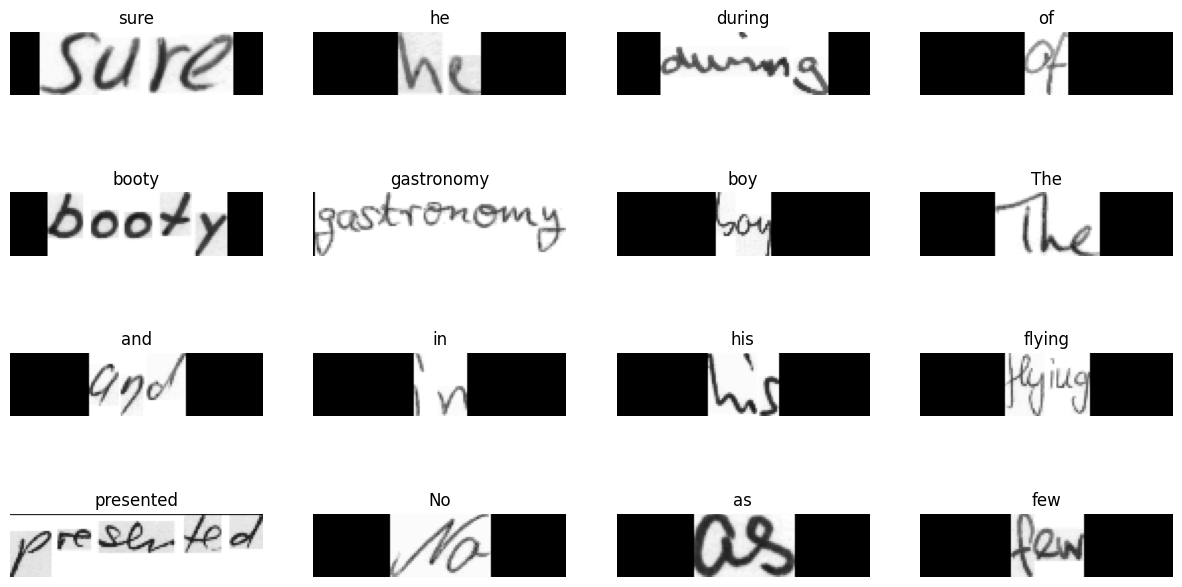

In [18]:
for data in train_ds.take(1):
  images, labels = data["image"], data["label"]
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  for i in range(16):
    img = images[i]
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    # Gather indices where Label!= padding token
    label = labels[i]
    indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
    # Convert to string.
    label = tf.strings.reduce_join(num_to_chars(indices))
    label = label.numpy().decode("utf-8")

    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")

  plt.show()


# **Model**

Model uses CTC loss as an endpoint layer.

In [19]:
class CTCLayer(keras.layers.Layer):

  def __init__(self, name=None):
    super().__init__(name=name)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    # At test time, just return the computed predictions.
    return y_pred

def build_model():
  input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
  labels = keras.layers.Input(name="label", shape=(None,))

  # first conv block
  x = keras.layers.Conv2D(
      32, (3,3), activation = "relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv1"
  )(input_img)
  x = keras.layers.MaxPooling2D((2,2), name="pool1")(x)

  # Second conv block
  x = keras.layers.Conv2D(
      64, (3,3), activation = "relu", kernel_initializer="he_normal",
      padding="same",
      name="Conv2"
  )(x)
  x = keras.layers.MaxPooling2D((2,2), name="pool2")(x)

  # We have two maxpool layers with pool size and strides 2
  # Hence downsampled feature maps are 4x smaller the number of filters in the last layer is 64,
  # Reshape accordingly before passing the output to the RNN part of the model.

  new_shape = ((image_width // 4), (image_height // 4) * 64)
  x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
  x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
  x = keras.layers.Dropout(0.2)(x)

  # RNN
  x = keras.layers.Bidirectional(
      keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
  )(x)
  x = keras.layers.Bidirectional(
    keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
  )(x)
  # +2 is to account for the two special tokens introduced by the CTC loss.
  # The recommendation comes here: https://git.10/J0eXP.
  x = keras.layers.Dense(
    len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
  )(x)
  # Add CTC layer for calculating CTC Loss at each step.
  output = CTCLayer(name="ctc_loss")(labels, x)

  # Define the model.
  model = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
  )

  # optimizer
  opt = keras.optimizers.Adam()
  # Compile the model and return
  model.compile(optimizer=opt)
  return model

# Get the model
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

# **Evaluation Metrix**

In [20]:
# Edit Distance is the most widely used metric for evaluating OCR models. In this section, we will implement it and use it as a callback to monitor
# ‘our model.

# We first segregate the validation images and their labels for convenience.

validation_images = []
validation_labels = []

for batch in validation_ds:
  validation_images.append(batch["image"])
  validation_labels.append(batch["label"])



Now we create a callback to monitor the edit distance

In [21]:
def calculate_edit_distance(labels, predictions):
  # Get a single batch and convert its labels to sparse tensors.
  sparse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

  # Make predictions and convert them to sparse tensors.
  input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
  predictions_decoded = keras.backend.ctc_decode(
    predictions, input_length=input_len, greedy=True
  )[0][0][:, :max_len]
  sparse_predictions = tf.cast(
    tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
  )

  # Compute individual edit distances and average them out.
  edit_distances = tf.edit_distance(
    sparse_predictions, sparse_labels, normalize=False
  )
  return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
  def __init__(self, pred_model):
    super().__init__()
    self.prediction_model = pred_model
  def on_epoch_end(self, epoch, logs = None):
    edit_distances = []

    for i in range(len(validation_images)):
      labels = validation_labels[i]
      predictions = self.prediction_model.predict(validation_images[i])
      edit_distances.append(calculate_edit_distance(labels, predictions).numpy())
    print(f"Mean eidt distance for each {epoch + 1}: {np.mean(edit_distances): .4f}")



# **Training**

In [22]:
# Now we are ready to kick off model training,

epochs = 20 # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
  model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[edit_distance_callback],
)

Epoch 1/20
1/1 [==============================] - 1s 1s/step
Mean eidt distance for each 1:  20.5306
1357/1357 [==============================] - 137s 92ms/step - loss: 13.5871 - val_loss: 12.0369
Epoch 2/20
1/1 [==============================] - 0s 32ms/step
Mean eidt distance for each 2:  20.0880
1357/1357 [==============================] - 72s 53ms/step - loss: 10.5784 - val_loss: 9.8025
Epoch 3/20
1/1 [==============================] - 0s 23ms/step
Mean eidt distance for each 3:  19.4675
1357/1357 [==============================] - 72s 53ms/step - loss: 8.7577 - val_loss: 7.5772
Epoch 4/20
1/1 [==============================] - 0s 21ms/step
Mean eidt distance for each 4:  18.8202
1357/1357 [==============================] - 72s 53ms/step - loss: 7.0966 - val_loss: 5.8162
Epoch 5/20
1/1 [==============================] - 0s 22ms/step
Mean eidt distance for each 5:  18.4047
1357/1357 [==============================] - 73s 54ms/step - loss: 5.8742 - val_loss: 4.6825
Epoch 6/20
1/1 [==

# **Inferences**

2/2 [==============================] - 0s 7ms/step


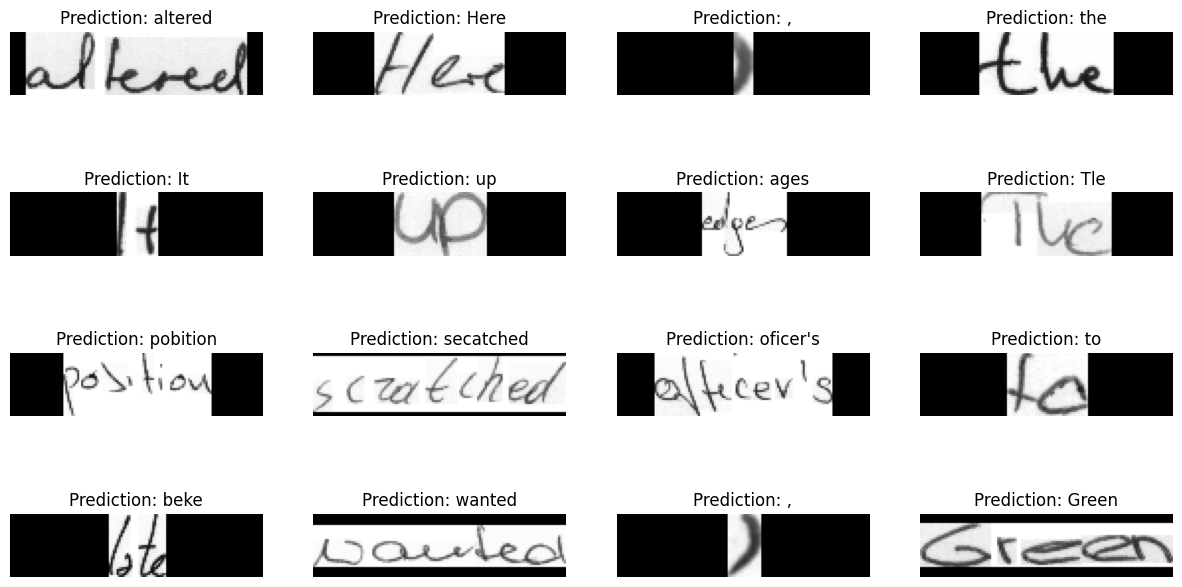

In [23]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    # Iterate over the results and get back the text.
    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


# Let's check results on sone test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()


In [42]:
#Thank you Santosh Sir for the opportunity